In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import msmexplorer as msme
from msmexplorer.utils import make_colormap
from matplotlib.colors import rgb2hex

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20

In [2]:
pi = np.load('pi.npy')

In [3]:
P = np.load('P.npy')

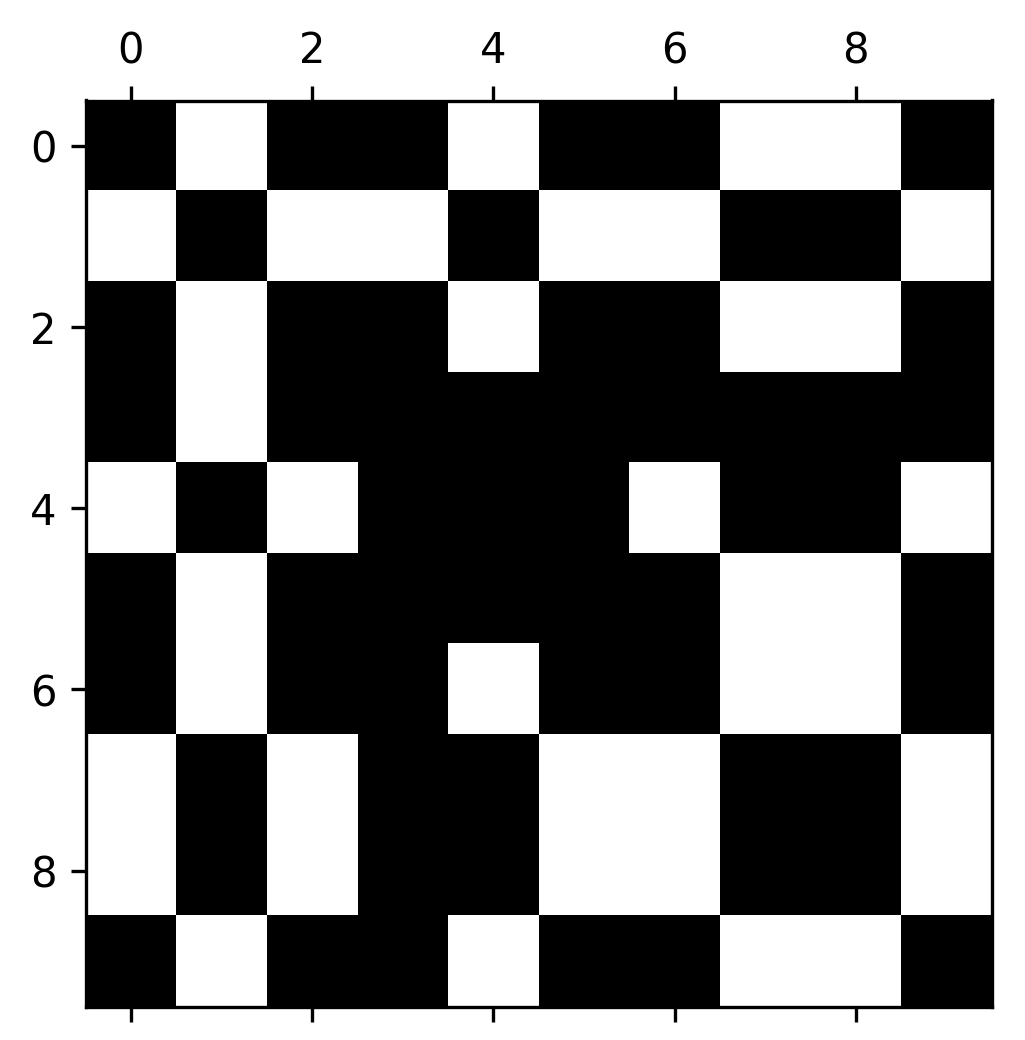

In [5]:
plt.figure(dpi=300)
plt.spy(P)
plt.show()

In [6]:
len(np.nonzero(P)[0])

60

In [7]:
len(np.concatenate(P))

100

In [9]:
(100 - 60) / 100

0.4

In [4]:
pi.shape

(10,)

In [5]:
P.shape

(10, 10)

In [6]:
fluxes = P.T * pi

In [7]:
np.allclose(fluxes, fluxes.T)

True

In [8]:
fluxes_no_diag = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        if i != j:
            fluxes_no_diag[i,j] = fluxes[i,j]
        else:
            fluxes_no_diag[i,j] = 0

In [9]:
fluxes_no_diag_sorted = np.zeros((10,10))

for i in range(10):
    i_ = np.argsort(pi)[::-1][i]
    for j in range(10):
        j_ = np.argsort(pi)[::-1][j]
        fluxes_no_diag_sorted[i,j] = fluxes_no_diag[i_,j_]

In [10]:
fluxes_no_diag_sorted_withblank = np.zeros((11,11))

for i in range(10):
    i_ = np.argsort(pi)[::-1][i]
    for j in range(10):
        j_ = np.argsort(pi)[::-1][j]
        fluxes_no_diag_sorted_withblank[i,j] = fluxes_no_diag[i_,j_]

In [15]:
free_energies = -np.log(pi/np.max(pi))

In [12]:
#normalized_free_energies = np.array(sorted(free_energies)) * 1/np.max(free_energies)

In [ ]:
# updated version - normalize to 6 kT for a nice scale on the colorbar

In [17]:
normalized_free_energies = np.array(sorted(free_energies)) * 1/6

In [16]:
free_energies

array([ 1.37375334,  4.71980421,  3.14033212,  4.00448515, -0.        ,
        0.41542183,  2.14806335,  0.29608734,  2.23500477,  1.132101  ])

In [18]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as pp
from matplotlib.path import Path
from matplotlib.colors import Normalize
import matplotlib.patches as patches

import seaborn.apionly as sns

In [19]:
def plot_chord(data, ax=None, cmap=None, labels=None, labelsize=12, norm=True,
               threshold=0.0):
    """
    Plot chord diagram from an adjacency matrix.
    Parameters
    ----------
    data : ndarray
        An adjacency matrix
    ax : matplotlib axis, optional (default: None)
        Axis to plot on, otherwise uses current axis.
    cmap : ColorMap, optional (default: None)
        Optional argument to set the desired colormap
    labels : list, optional (default: None)
        A list of str labels
    labelsize : int, optional (default: 12)
        Label font size
    norm : boolean, optional (default: True)
        Optional argument to normalize data into the [0.0, 1.0] range
    threshold : float, optional (default: 0.0)
        Threshold value for an edge  to be plotted
    Returns
    -------
    ax : Axis
        matplotlib figure axis
    """

    linewidth = 2
    data = np.array(data).copy()
    if norm:
        data /= data.max()
    data[data < threshold] = 0.0

    if len(data.shape) != 2:
        raise ValueError('data must be a 2d array.')
    if data.shape[0] != data.shape[1]:
        raise ValueError('data is not an adjacency matrix')

    if not ax:
        ax = pp.gca(projection='polar')
    if cmap is None:
        cmap = pp.cm.coolwarm

    scale = Normalize(vmin=0, vmax=data.shape[0])

    res = 2048

    theta = np.linspace(0, 2 * np.pi, res * data.shape[0])
    r = np.linspace(0.6, 1, 4)

    # Create separators
    for i in range(data.shape[0]):
        theta_i = i * 360 * np.pi / (180 * data.shape[0])
        ax.plot([theta_i, theta_i], [r[1], 1], '-', color='#fcfcfc',
                lw=linewidth)

    # Create outer ring
    r0 = r[1:3]
    r0 = np.repeat(r0[:, np.newaxis], res, axis=1).T
    for i in range(data.shape[0]):
        theta0 = theta[i * res:i * res + res] + \
            360 * np.pi / (data.shape[0] * 180)
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((res, 2)) * i
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=scale)

    # Set labels
    ax.set_ylim([0, .8])
    ax.set_yticklabels([])
    offset = (3 * np.pi / data.shape[0])

    pos = (np.linspace(0, 2 * np.pi, data.shape[0] + 1) + offset) % (2 * np.pi)

    if labels:
        ax.set_xticks(pos)
        ax.set_xticklabels(labels, size=int(labelsize))
    else:
        ax.set_xticklabels([])

    ax.plot(np.linspace(-np.pi, np.pi, 2048), 2048 * [.73], color='black',
            zorder=10, lw=1.5)

    # Plot connections
    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i != j and data[i, j] > 0.:
                offset_i = .1 * (j - (data.shape[0] - 1) / 2)
                offset_i *= offset / data.shape[0]
                offset_j = .1 * (i - (data.shape[0] - 1) / 2)
                offset_j *= offset / data.shape[0]
                verts = [
                    (pos[i] + offset_i, 0.9),  # P0
                    (pos[i] + offset_i, 0.5),  # P1
                    (pos[j] + offset_j, 0.5),  # P2
                    (pos[j] + offset_j, 0.9)  # P3
                ]

                path = Path(verts, codes)
                patch = patches.PathPatch(path, facecolor='none',
                                          edgecolor=cmap(scale(i)),
                                          lw=10 * data[i, j], alpha=0.3,
                                          capstyle='round', zorder=-1)
                ax.add_patch(patch)
    return ax

In [20]:
cmap = matplotlib.cm.get_cmap('seismic')

In [21]:
#cmap_ = make_colormap([rgb2hex(cmap(x)) for x in normalized_free_energies] + ['#ffffff', '#ffffff'])

#sm = plt.cm.ScalarMappable(cmap=cmap)
#sm._A = []

#plt.figure(dpi=300)
#plot_chord(fluxes_no_diag_sorted_withblank, norm=True, labels=list(np.argsort(pi)[::-1])+[''], cmap=cmap_)
#cb = plt.colorbar(sm)
#cb.ax.set_yticklabels([0, format(0.2*np.max(free_energies), '.2f'), format(0.4*np.max(free_energies), '.2f'), format(0.6*np.max(free_energies), '.2f'), format(0.8*np.max(free_energies), '.2f'), format(1.0*np.max(free_energies), '.2f')])
#cb.set_label('Free energy (kT)')
#plt.savefig('chord_diagrams/sam_chord_diagram.png', dpi=300)
#plt.savefig('chord_diagrams/sam_chord_diagram.pdf')
#plt.show()

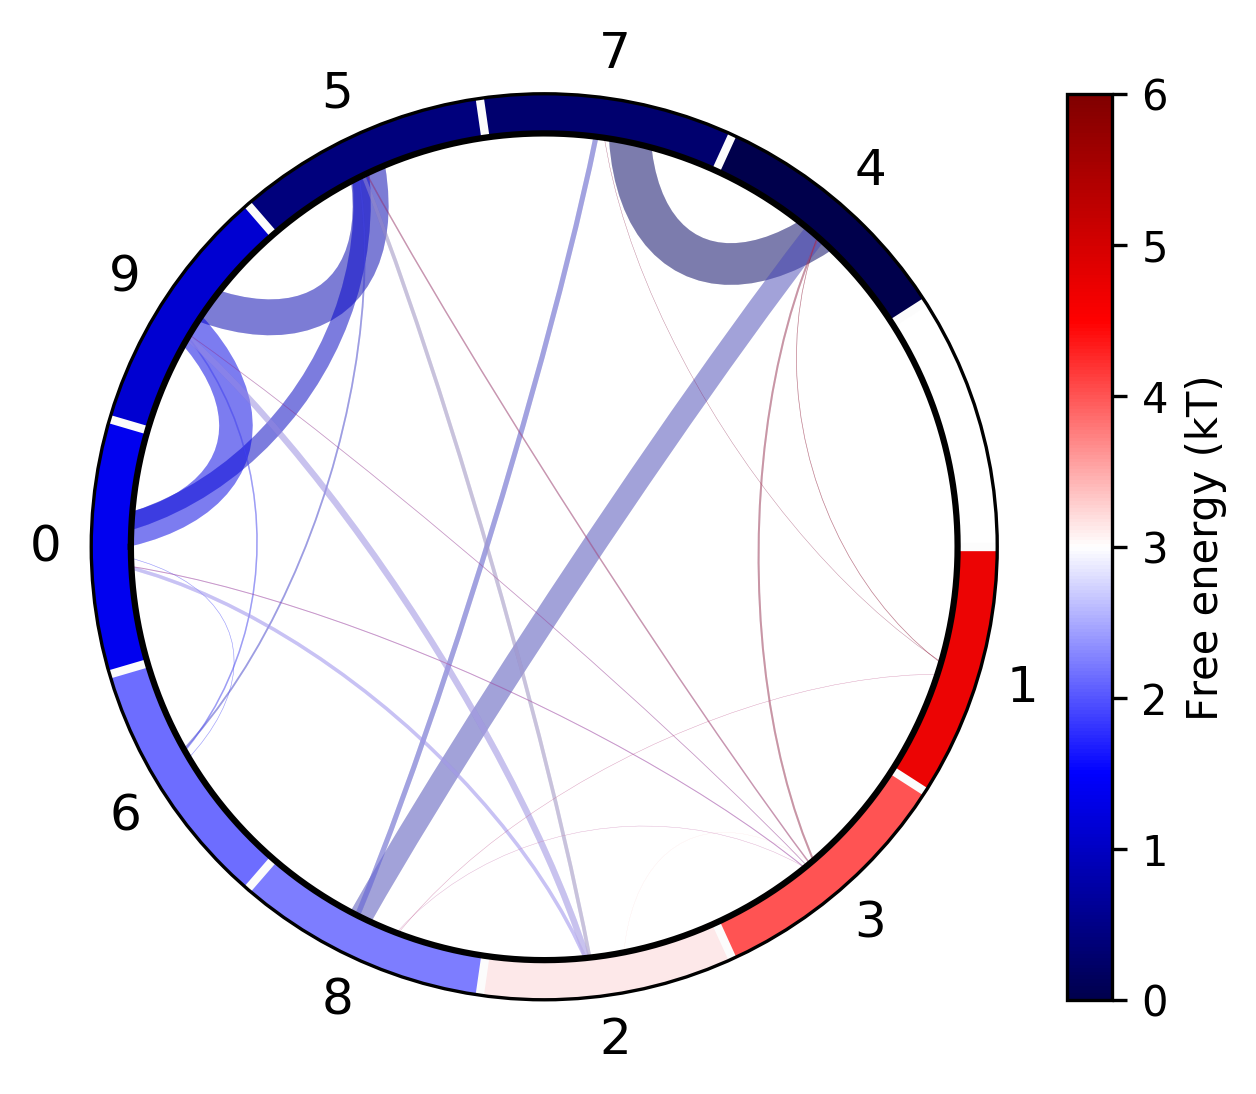

In [22]:
cmap_ = make_colormap([rgb2hex(cmap(x)) for x in normalized_free_energies] + ['#ffffff', '#ffffff'])

sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []

plt.figure(dpi=300)
plot_chord(fluxes_no_diag_sorted_withblank, norm=True, labels=list(np.argsort(pi)[::-1])+[''], cmap=cmap_)
cb = plt.colorbar(sm)
cb.set_ticks([0, 1/6, 2/6, 3/6, 4/6, 5/6, 1])
cb.ax.set_yticklabels([0,1,2,3,4,5,6])
cb.set_label('Free energy (kT)')
plt.savefig('chord_diagrams/sam_chord_diagram.png', dpi=300)
plt.savefig('chord_diagrams/sam_chord_diagram.pdf')
plt.show()

In [23]:
def plot_chord_whiterim(data, ax=None, cmap=None, labels=None, labelsize=12, norm=True,
               threshold=0.0):
    """
    Plot chord diagram from an adjacency matrix.
    Parameters
    ----------
    data : ndarray
        An adjacency matrix
    ax : matplotlib axis, optional (default: None)
        Axis to plot on, otherwise uses current axis.
    cmap : ColorMap, optional (default: None)
        Optional argument to set the desired colormap
    labels : list, optional (default: None)
        A list of str labels
    labelsize : int, optional (default: 12)
        Label font size
    norm : boolean, optional (default: True)
        Optional argument to normalize data into the [0.0, 1.0] range
    threshold : float, optional (default: 0.0)
        Threshold value for an edge  to be plotted
    Returns
    -------
    ax : Axis
        matplotlib figure axis
    """

    linewidth = 2
    data = np.array(data).copy()
    if norm:
        data /= data.max()
    data[data < threshold] = 0.0

    if len(data.shape) != 2:
        raise ValueError('data must be a 2d array.')
    if data.shape[0] != data.shape[1]:
        raise ValueError('data is not an adjacency matrix')

    if not ax:
        ax = pp.gca(projection='polar')
    if cmap is None:
        cmap = pp.cm.coolwarm

    scale = Normalize(vmin=0, vmax=data.shape[0])

    res = 2048

    theta = np.linspace(0, 2 * np.pi, res * data.shape[0])
    r = np.linspace(0.6, 1, 4)

    # Create separators
    for i in range(data.shape[0]):
        theta_i = i * 360 * np.pi / (180 * data.shape[0])
        ax.plot([theta_i, theta_i], [r[1], 1], '-', color='#000000',
                lw=linewidth)

        
    cmap2 = make_colormap(['#ffffff']*26)    
    # Create outer ring
    r0 = r[1:3]
    r0 = np.repeat(r0[:, np.newaxis], res, axis=1).T
    for i in range(data.shape[0]):
        theta0 = theta[i * res:i * res + res] + \
            360 * np.pi / (data.shape[0] * 180)
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((res, 2)) * i
        ax.pcolormesh(theta0, r0, z, cmap=cmap2, norm=scale)

    # Set labels
    ax.set_ylim([0, .8])
    ax.set_yticklabels([])
    offset = (3 * np.pi / data.shape[0])

    pos = (np.linspace(0, 2 * np.pi, data.shape[0] + 1) + offset) % (2 * np.pi)

    if labels:
        ax.set_xticks(pos)
        ax.set_xticklabels(labels, size=int(labelsize))
    else:
        ax.set_xticklabels([])

    ax.plot(np.linspace(-np.pi, np.pi, 2048), 2048 * [.73], color='black',
            zorder=10, lw=1.5)

    # Plot connections
    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i != j and data[i, j] > 0.:
                offset_i = .1 * (j - (data.shape[0] - 1) / 2)
                offset_i *= offset / data.shape[0]
                offset_j = .1 * (i - (data.shape[0] - 1) / 2)
                offset_j *= offset / data.shape[0]
                verts = [
                    (pos[i] + offset_i, 0.9),  # P0
                    (pos[i] + offset_i, 0.5),  # P1
                    (pos[j] + offset_j, 0.5),  # P2
                    (pos[j] + offset_j, 0.9)  # P3
                ]

                path = Path(verts, codes)
                patch = patches.PathPatch(path, facecolor='none',
                                          edgecolor=cmap(scale(i)),
                                          lw=10 * data[i, j], alpha=0.3,
                                          capstyle='round', zorder=-1)
                ax.add_patch(patch)
    return ax

In [14]:
#cmap_ = make_colormap([rgb2hex(cmap(x)) for x in normalized_free_energies] + ['#ffffff', '#ffffff'])

#sm = plt.cm.ScalarMappable(cmap=cmap)
#sm._A = []

#plt.figure(dpi=300)
#plot_chord_whiterim(fluxes_no_diag_sorted_withblank, norm=True, labels=list(np.argsort(pi)[::-1])+[''], cmap=cmap_)
#cb = plt.colorbar(sm)
#cb.ax.set_yticklabels([0, format(0.2*np.max(free_energies), '.2f'), format(0.4*np.max(free_energies), '.2f'), format(0.6*np.max(free_energies), '.2f'), format(0.8*np.max(free_energies), '.2f'), format(1.0*np.max(free_energies), '.2f')])
#cb.set_label('Free energy (kT)')
#plt.savefig('chord_diagrams/sam_chord_diagram_whiterim.png', dpi=300)
#plt.savefig('chord_diagrams/sam_chord_diagram_whiterim.pdf')
#plt.show()

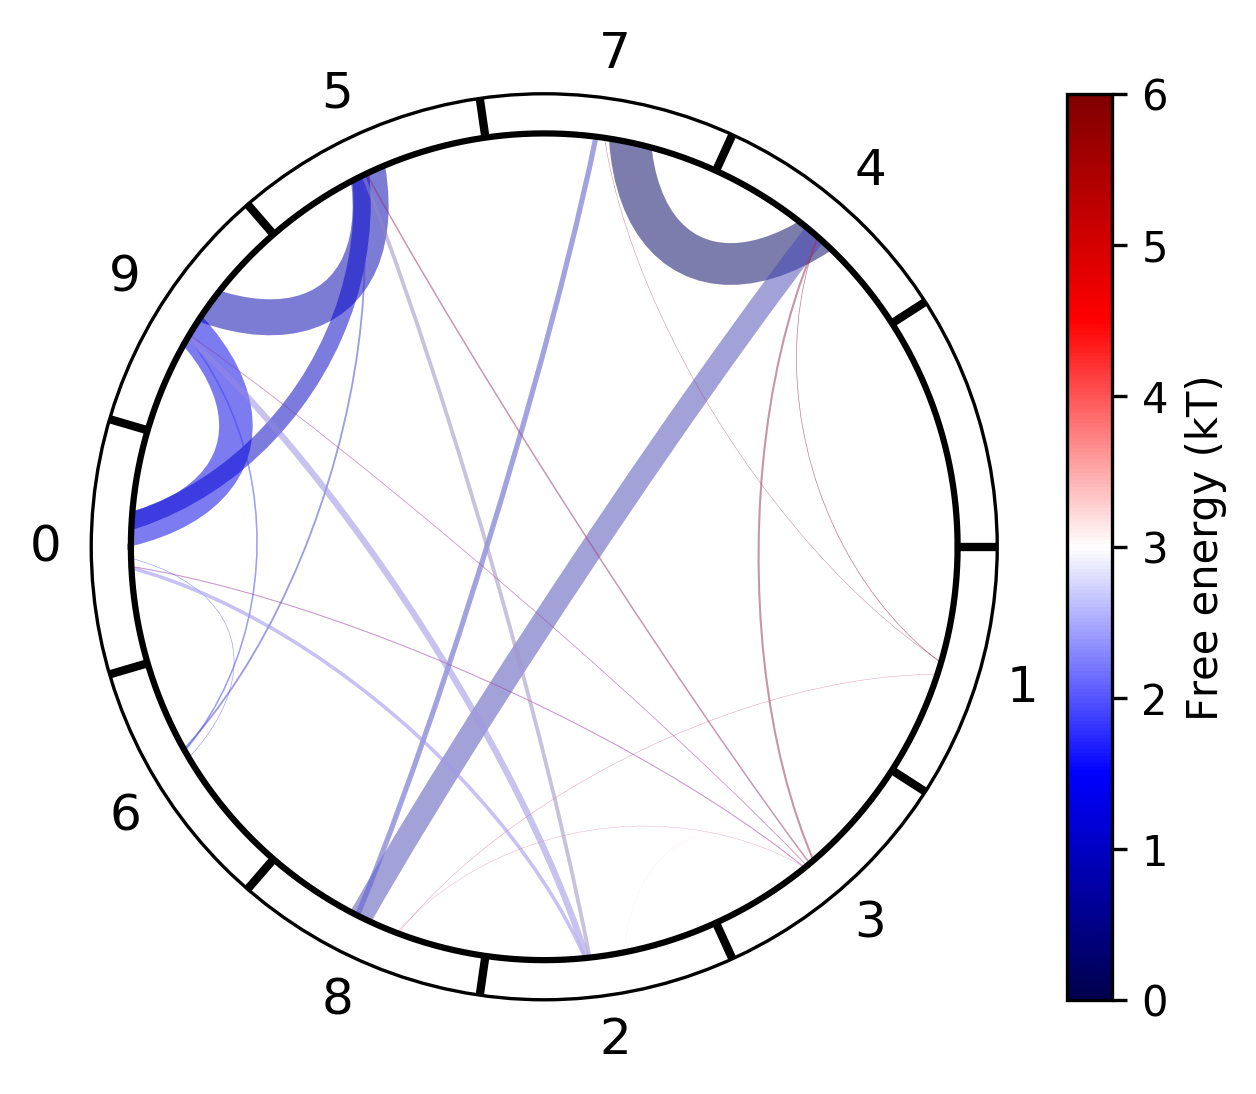

In [24]:
cmap_ = make_colormap([rgb2hex(cmap(x)) for x in normalized_free_energies] + ['#ffffff', '#ffffff'])

sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []

plt.figure(dpi=300)
plot_chord_whiterim(fluxes_no_diag_sorted_withblank, norm=True, labels=list(np.argsort(pi)[::-1])+[''], cmap=cmap_)
cb = plt.colorbar(sm)
cb.set_ticks([0, 1/6, 2/6, 3/6, 4/6, 5/6, 1])
cb.ax.set_yticklabels([0,1,2,3,4,5,6])
cb.set_label('Free energy (kT)')
plt.savefig('chord_diagrams/sam_chord_diagram_whiterim.png', dpi=300)
plt.savefig('chord_diagrams/sam_chord_diagram_whiterim.pdf')
plt.show()

In [9]:
# save flux matrix as .npy, heatmaps and csv

In [10]:
np.save('flux_matrix', fluxes_no_diag)

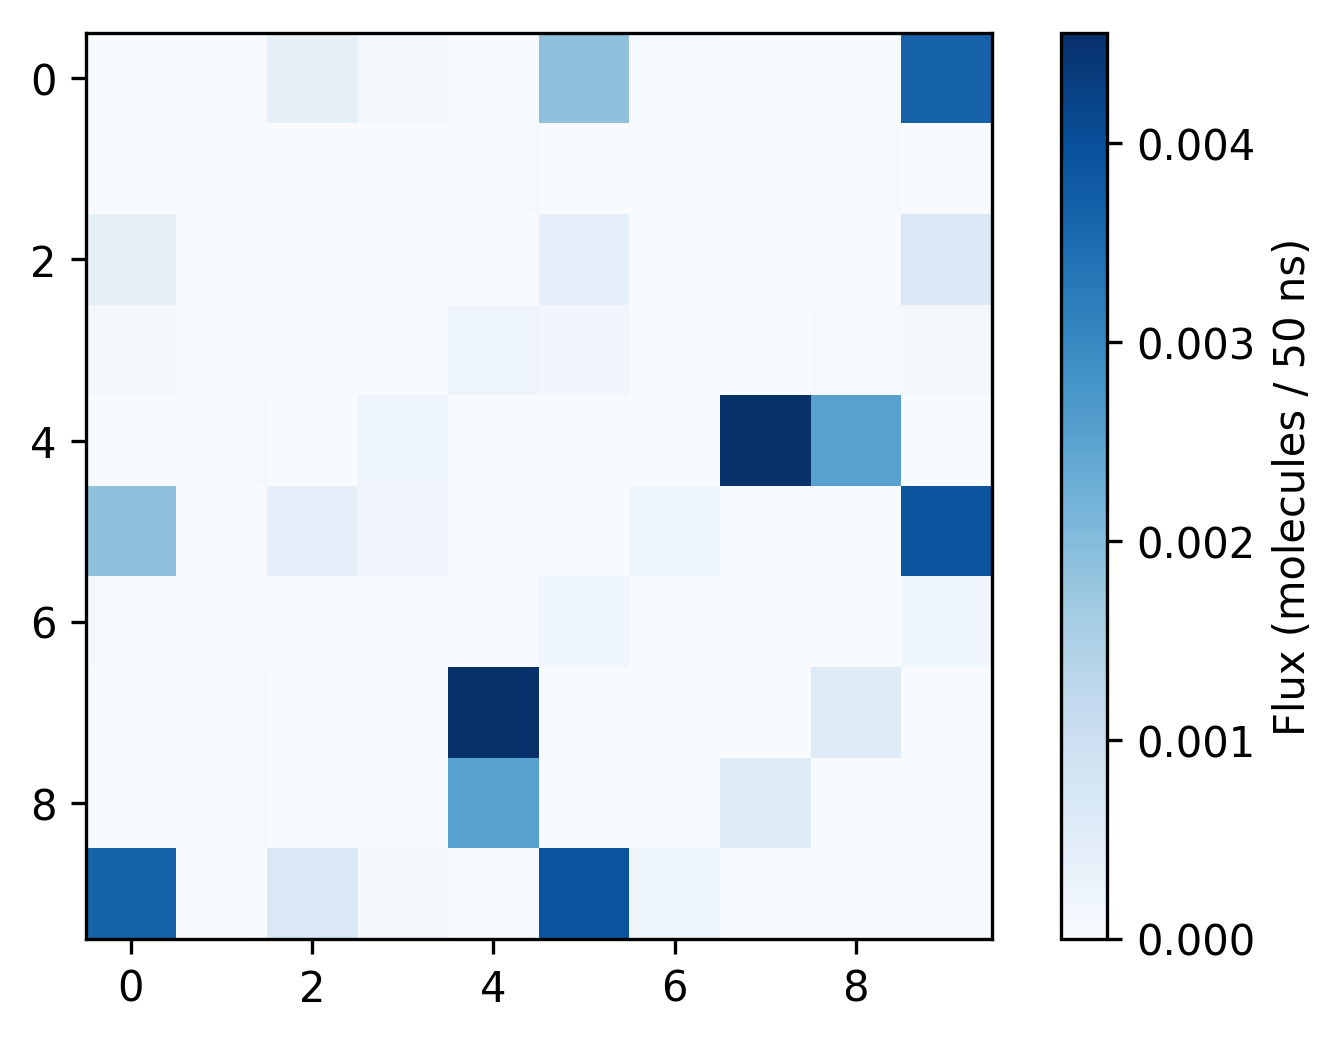

In [11]:
plt.figure(dpi=300)
plt.imshow(fluxes_no_diag, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Flux (molecules / 50 ns)')
plt.savefig('flux_matrix.png', dpi=300)
plt.show()

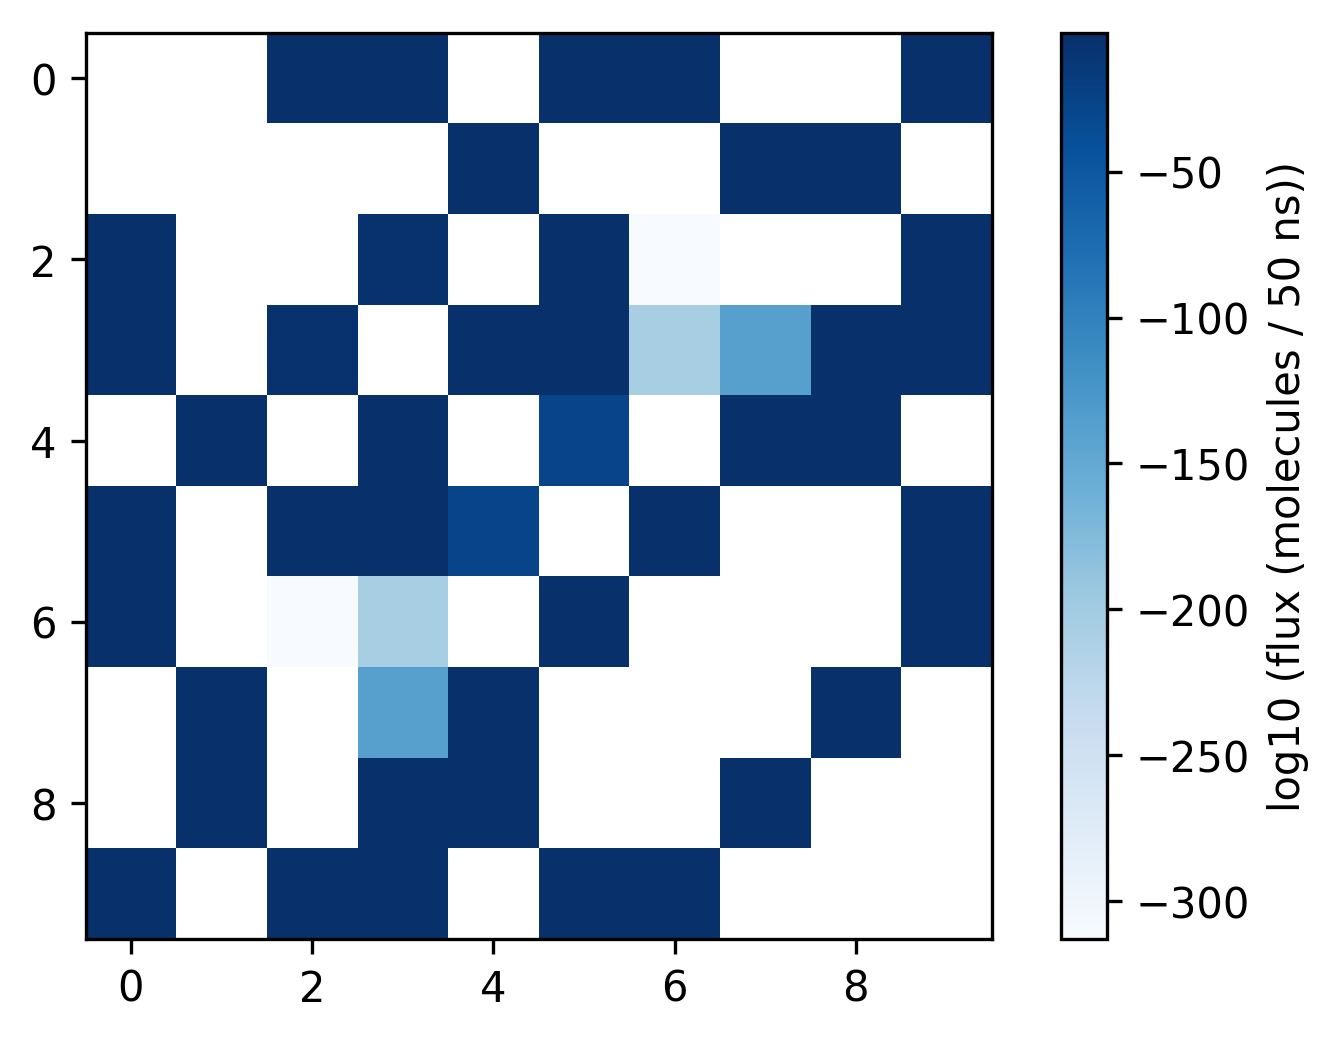

In [12]:
plt.figure(dpi=300)
plt.imshow(np.log10(fluxes_no_diag), cmap='Blues')
cb = plt.colorbar()
cb.set_label('log10 (flux (molecules / 50 ns))')
plt.savefig('flux_matrix_log10.png', dpi=300)
plt.show()

In [15]:
np.savetxt('flux_matrix.csv', fluxes_no_diag, delimiter=',')

In [16]:
np.savetxt('flux_matrix_concatenate.csv', np.concatenate(fluxes_no_diag), delimiter=',')

In [25]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11708_11710_SET8_ligands/dih/SAM/hmms/results/12'